<h1 style="color:#9A11DA;"> What is a Hadamard Test?</h1> 
The Hadamard Test allows for estimating the measurment $\langle \psi | U | \psi \rangle$ for a unitary operation $U$ and a quantum state $|\psi \rangle$. In this challenge you'll be working on creating the Hadamard Test for measuring both real and imaginary values on various quantum computers. 

Here's some documentation for you to get started:

[Wikipedia](https://en.wikipedia.org/wiki/Hadamard_test_(quantum_computation))

[Victoroy Omole's Blog on QPE and Hadamard Test](https://vtomole.com/blog/2018/05/20/pea)


<h2 style="color:#9A11DA;">qBraid SDK</h2> 

qBraid-SDK is our tool to braid various quantum SDKs into one cohesive experience. With qBraid-SDK, you can develop quantum circuits and run them on quantum computers available from, IBM, Rigetti, OQC, and IonQ. You are also welcome to develop your quantum circuits in the language of your choice (qiskit, cirq, braket, or qasm) and specify the quantum device you want to run them, and qBraid-SDK will run the circuits and get you the results. qBraid-SDK includes a transpiler which allows it to convert the circuits between various languages. You can also use the transpiler for your quantum code. The SDK also has many auxiliary features that allow you to keep track of your quantum jobs and find out the status of various quantum computers. 
Learn more about the qBraid-SDK at https://qbraid-qbraid.readthedocs-hosted.com/en/latest/sdk/overview.html

<h2 style="color:#9A11DA;">Getting Started </h2>

### Add permissions and credits
1. Make sure you have added the code `QISKITFALL22` on your [account](https://account.qbraid.com/account-details)  in the **Add an access key** section.  If you already have already done this step move onto step 4.

<img align="center" width='350px' src='./images/account_details.png'>
2. You should receive a message like this:

<img align="center" width='350px' src='./images/confirmed.png'>
3. Reload this page!

## Activate the qBraid SDK environment
4. On the top right you should see the `ENVS` button. Click it!
5. Click the +ADD button and open the drop down arrow 

<img align="center"  width='100px' src='./images/add.png'>
6. Install the qBraid SDK! It will take a few minutes.

<img align="center"  width='200px' src='./images/qbraid_sdk.png'>
7. Activate the environment

<img align="center"  width='200px' src='./images/activate.png'>

8. Activate the kernel

<img align="center"  width='200px' src='./images/kernel.png'>



## You're all ready to go!
By running the cell below you will be able to run quantum jobs on qBraid. Learn more about the qBraid SDK [here](https://qbraid-qbraid.readthedocs-hosted.com/en/stable/sdk/overview.html)

### How to win
**Creativity is key here.** Try to learn about what our SDK is capable and the various applications of the hadmard test. Some ideas can be to use the two functions to make a game, extend it in the likes of the Aharonov-Jones-Landau algorithm, computing inner products and more. 

**Run on multiple simulators and devices using the qBraid SDK's transpiling and job submitting functionality is also key!**

**Write clean documentation and code** Clean code will help judges discern who understands the material and can conscisely explain it to others.

**Provide installation instructions** If there are any additional installation/getting started steps please mention them!

In [1]:
! qbraid jobs enable qbraid_sdk

You have already enabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [2]:
def hadamard_test_real():
    # Your code here
    pass

In [3]:
def hadamard_test_imag():
    # Your code here
    pass

### qBraid SDK DEMO: Run on various hardware


In [4]:
from qbraid import get_devices
from qiskit import IBMQ

In [5]:
get_devices()

Provider,Name,qBraid ID,Status
AWS,Braket Default Simulator,aws_braket_default_sim,●
AWS,Density Matrix Simulator,aws_dm_sim,●
AWS,State Vector Simulator,aws_sv_sim,●
AWS,Tensor Network Simulator,aws_tn_sim,●
D-Wave,Advantage_system4,aws_dwave_advantage_system4,●
D-Wave,DW_2000Q_6,aws_dwave_2000Q_6,●
Google,Bristlecone,google_bristlecone,○
Google,Cirq Density Matrix Simulator,google_cirq_dm_sim,●
Google,Cirq Sparse Simulator,google_cirq_sparse_sim,●
Google,Foxtail,google_foxtail,○


Don't forget to add your IBMQ Key

In [6]:
IBMQ.save_account('40ddcc5775f97a95f4753f0bf67cb75c48f49e1daa2f98f1d82c8a594bbce0d52535caabc9af4454049709376de81e64eced000282fb6228766a5d56efa186e6')

configrc.store_credentials:WARNING:2022-10-22 20:08:33,741: Credentials already present. Set overwrite=True to overwrite.


In [7]:
from qbraid import device_wrapper, job_wrapper, get_jobs
from qbraid.api import ibmq_least_busy_qpu, verify_config

### A simple circuit

In [8]:
from qiskit import QuantumCircuit
import numpy as np

qiskit_circuit = QuantumCircuit(1, 1)

qiskit_circuit.h(0)
qiskit_circuit.ry(np.pi / 4, 0)
qiskit_circuit.rz(np.pi / 2, 0)
qiskit_circuit.measure(0, 0)

qiskit_circuit.draw()

┌───┐┌─────────┐┌─────────┐┌─┐
  q: ┤ H ├┤ Ry(π/4) ├┤ Rz(π/2) ├┤M├
     └───┘└─────────┘└─────────┘└╥┘
c: 1/════════════════════════════╩═
                                 0

#### Specify devices
We will specfiy which device we want to run in this case we will run the qiskit circuit on aws and google.

In [9]:
shots=200
google_id = "google_cirq_dm_sim"
qbraid_google_device = device_wrapper(google_id)

aws_id = "aws_dm_sim"
qbraid_aws_device = device_wrapper(aws_id)  # Credential handled by qBraid Quantum Jobs

S3 Bucket [None]: 

 Bla bla bla


S3 Bucket Folder [None]: 

 bla bla part2


Let's run the circuit!!!

In [10]:
qbraid_google_job = qbraid_google_device.run(qiskit_circuit, shots=shots)
qbraid_aws_job = qbraid_aws_device.run(qiskit_circuit, shots=shots)

#### Monitor and manage your jobs from one location

In [11]:
get_jobs()

In [12]:
jobs = [qbraid_google_job, qbraid_aws_job]
google_result, aws_result = [job.result() for job in jobs]

##### Get results

In [13]:
print(f"{qbraid_google_device.name} counts: {google_result.measurement_counts()}")
print(f"{qbraid_aws_device.name} counts: {aws_result.measurement_counts()}")

Cirq Density Matrix Simulator counts: {'1': 171, '0': 29}
Density Matrix Simulator counts: {'1': 169, '0': 31}


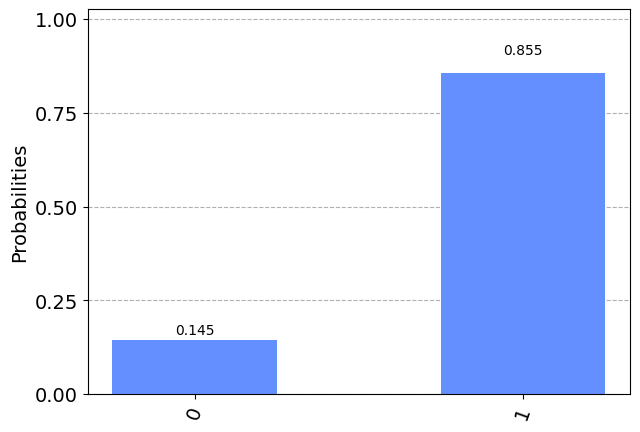

In [14]:
google_result.plot_counts()

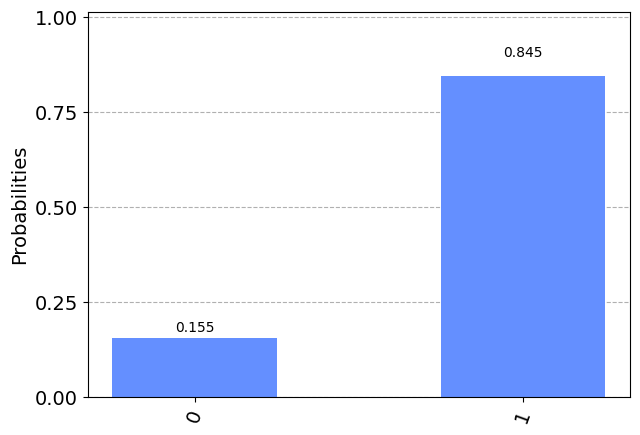

In [15]:
aws_result.plot_counts()

<h1 style="color:#9A11DA;"> Our submission (Souaad & Nesrine) </h1>

<h2> Description of the game </h2>
For this challenge, we wanted to apply the concepts we learned during today's Fest.

The idea of the game was inspired by one of the examples given by our workshop mentor, 
where a coin getting flipped represents the superposition state of a qubit until it gets on one side (head or tale) and that's the defined state of the qubit (0 or 1)

In [ ]:
Although this idea seems to have been explored before, we tried our best to implement it using the most basic quantum circuit.

The game goes as follows : 


    - Given that the coin is in a particular state, and both players can't see it (suppose it's inside a box for example).    
    - Player A comes and makes a move (flip or keep), player B doesn't know what was chosen.
    - Player B comes and makes a move (flip or keep), player A doesn't know what was chosen.
    - Player A comes and makes a move (flip or keep), player B doesn't know what was chosen.
    - If the coin is head up, player A wins, else player B wins.
    

In [39]:
## Imports that we need
# Circuits and registers
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
# execute function, and the python based quantum simulators
from qiskit import execute, BasicAer
# UI controls for interactivity
from ipywidgets import interact

We define our functions for the game

In [40]:
# When A makes their first move
def MoveA1(move): global moveA1; moveA1 = move;
# When B makes their first move
def MoveB1(move): global moveB1; moveB1 = move;
# When A makes their second move
def MoveA2(move): global moveA2; moveA2 = move;

The main function which is : winner()

In [41]:
def winner(counts) :
    print(counts)
    if len(counts) == 1 :
        print('Congratulations to ')
        if ("0" in counts) :
            print('A')
        else :
            print('B')
    else :
        count0 = counts["0"]
        count1 = counts["1"]
        print('Superposition !!')
        print('Probability of A winning is :', '%.1f%%' % (100.*count0/(count0+count1)))
        print('Probability of B winning is :', '%.1f%%' % (100.*count1/(count0+count1)))
        return()
        

<h2> Time to play </h2>

<h3> Player A makes a move </h3>

In [42]:
interact(MoveA1, move={'keep it': 0, 'flip it': 1});

interactive(children=(Dropdown(description='move', options={'keep it': 0, 'flip it': 1}, value=0), Output()), …

<h3>Player B makes a move</h3>

In [43]:
interact(MoveB1, move={'keep it': 0, 'flip it': 1});

interactive(children=(Dropdown(description='move', options={'keep it': 0, 'flip it': 1}, value=0), Output()), …

<h3>Player A makes a move again</h3>

In [44]:
interact(MoveA2, move={'keep it': 0, 'flip it': 1});

interactive(children=(Dropdown(description='move', options={'keep it': 0, 'flip it': 1}, value=0), Output()), …

Just to check what happened, we'll print the three moves (0 means keeping the coin as it is, 1 means flipping the coin)

In [45]:
print(moveA1, moveB1, moveA2)

0 0 0


Now for the Quantum magic !

In [46]:
# Create a quantum register of one qubit
q = QuantumRegister(1)

# Create a classical register of one qubit
c = ClassicalRegister(1)

# Create a quantum circuit of the two registers
qc = QuantumCircuit(q, c)

# Define our backend (the qasm simulator that we used in today's workshop)
backend = BasicAer.get_backend('qasm_simulator')

# Call our game functions (the players' game)
qc.id(q[0]) if (moveA1 == 0) else qc.x(q[0])
qc.id(q[0]) if (moveB1 == 0) else qc.x(q[0])
qc.id(q[0]) if (moveA2 == 0) else qc.x(q[0])

# Measure our qubits
qc.measure(q, c)

In [47]:
# Define a job and execute it in the defined backend
job = execute(qc, backend, shots=20)

result = job.result()

counts = result.get_counts(qc)

# Congratulate the winner :)
winner(counts)

{'0': 20}
Congratulations to 
A


In [48]:
print("Thank you for playing")

Thank you for playing
